# MAIN OBJECTIVE 
## USING UNSUPERVISED AND SUPERVISED LEARNING MODELS TO SEGREGATE AND PREDICT THE CLASS OF PUMPKIN SEED 


# DATASET USED = PUMPKIN SEED DATASET
Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality types of pumpkin seeds, ‘‘Urgup_Sivrisi’’ and ‘‘Cercevelik’’, generally grown in Urgup and Karacaoren regions in Turkey. However, morphological measurements of 2500 pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques. Considering morphological features, all the data were modeled with five different machine learning methods: Logistic Regression (LR), Multilayer Perceptrons (MLP), Support Vector Machine (SVM) and Random Forest (RF), and k-Nearest Neighbor (k-NN), which further determined the most successful method for classifying pumpkin seed varieties. However, the performances of the models were determined with the help of the 10 kfold cross-validation method. The accuracy rates of the classifiers were obtained as LR 87.92 percent, MLP 88.52 percent, SVM 88.64 percent, RF 87.56 percent, and k-NN 87.64 percent.
DATASET: https://www.muratkoklu.com/datasets/Pumpkin_Seeds_Dataset.zip

TOTAL ROWS = 2500

FEATURES:
|FEATURE|N ROWS| TYPE|
|-----|-----|-----|
 |0   Area        |       2500 non-null |  int64|  <BR><BR>
 1   Perimeter         | 2500 non-null   |float64| <BR><BR>
 2   Major_Axis_Length | 2500 non-null   |float64|<BR><BR>
 3   Minor_Axis_Length | 2500 non-null  | float64|<BR><BR>
 4   Convex_Area      |  2500 non-null  | int64  |<BR><BR>
 5   Equiv_Diameter   |  2500 non-null   |float64|<BR><BR>
 6   Eccentricity     |  2500 non-null  | float64|<BR><BR>
 7   Solidity         |  2500 non-null  | float64|<BR><BR>
 8   Extent           |  2500 non-null  | float64|<BR><BR>
 9   Roundness        |  2500 non-null  | float64|<BR><BR>
 10  Aspect_Ration    |  2500 non-null  | float64|<BR><BR>
 11  Compactness      |  2500 non-null  | float64|<BR><BR>
 12  Class            |  2500 non-null  | object |<BR><BR>
 13  LR               |  2500 non-null  | float64|<BR><BR>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, MeanShift
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [7]:
dataset = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
dataset.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [9]:
dataset.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [10]:
dataset.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

# FEATURE ENGINEERING
TAKE LATUS RECTUM EQUAL TO 2*(MINOR_AXIS_LENGTH)^2/MAJOR_AXIS_LENGTH <BR>
# DATA CLEANING
REMOVING SOLIDITY AS VARIANCE IN SOLIDITY VERY LITTLE NOT PROVIDING VALUABLE INFO <BR>
 

In [11]:
dataset['LR'] =  2*dataset['Major_Axis_Length']**2 / dataset['Minor_Axis_Length']

In [12]:
dataset.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class           LR  
0       0.8207  Çerçevelik   965.977331  
1       0.7487  Çerçevelik  1486.154494  
2       0.6929  Çerçevelik  1800.086233  
3       0.7624  Çerçevelik  1308.493184  
4       0.7557  Çerçevelik  1336.967282

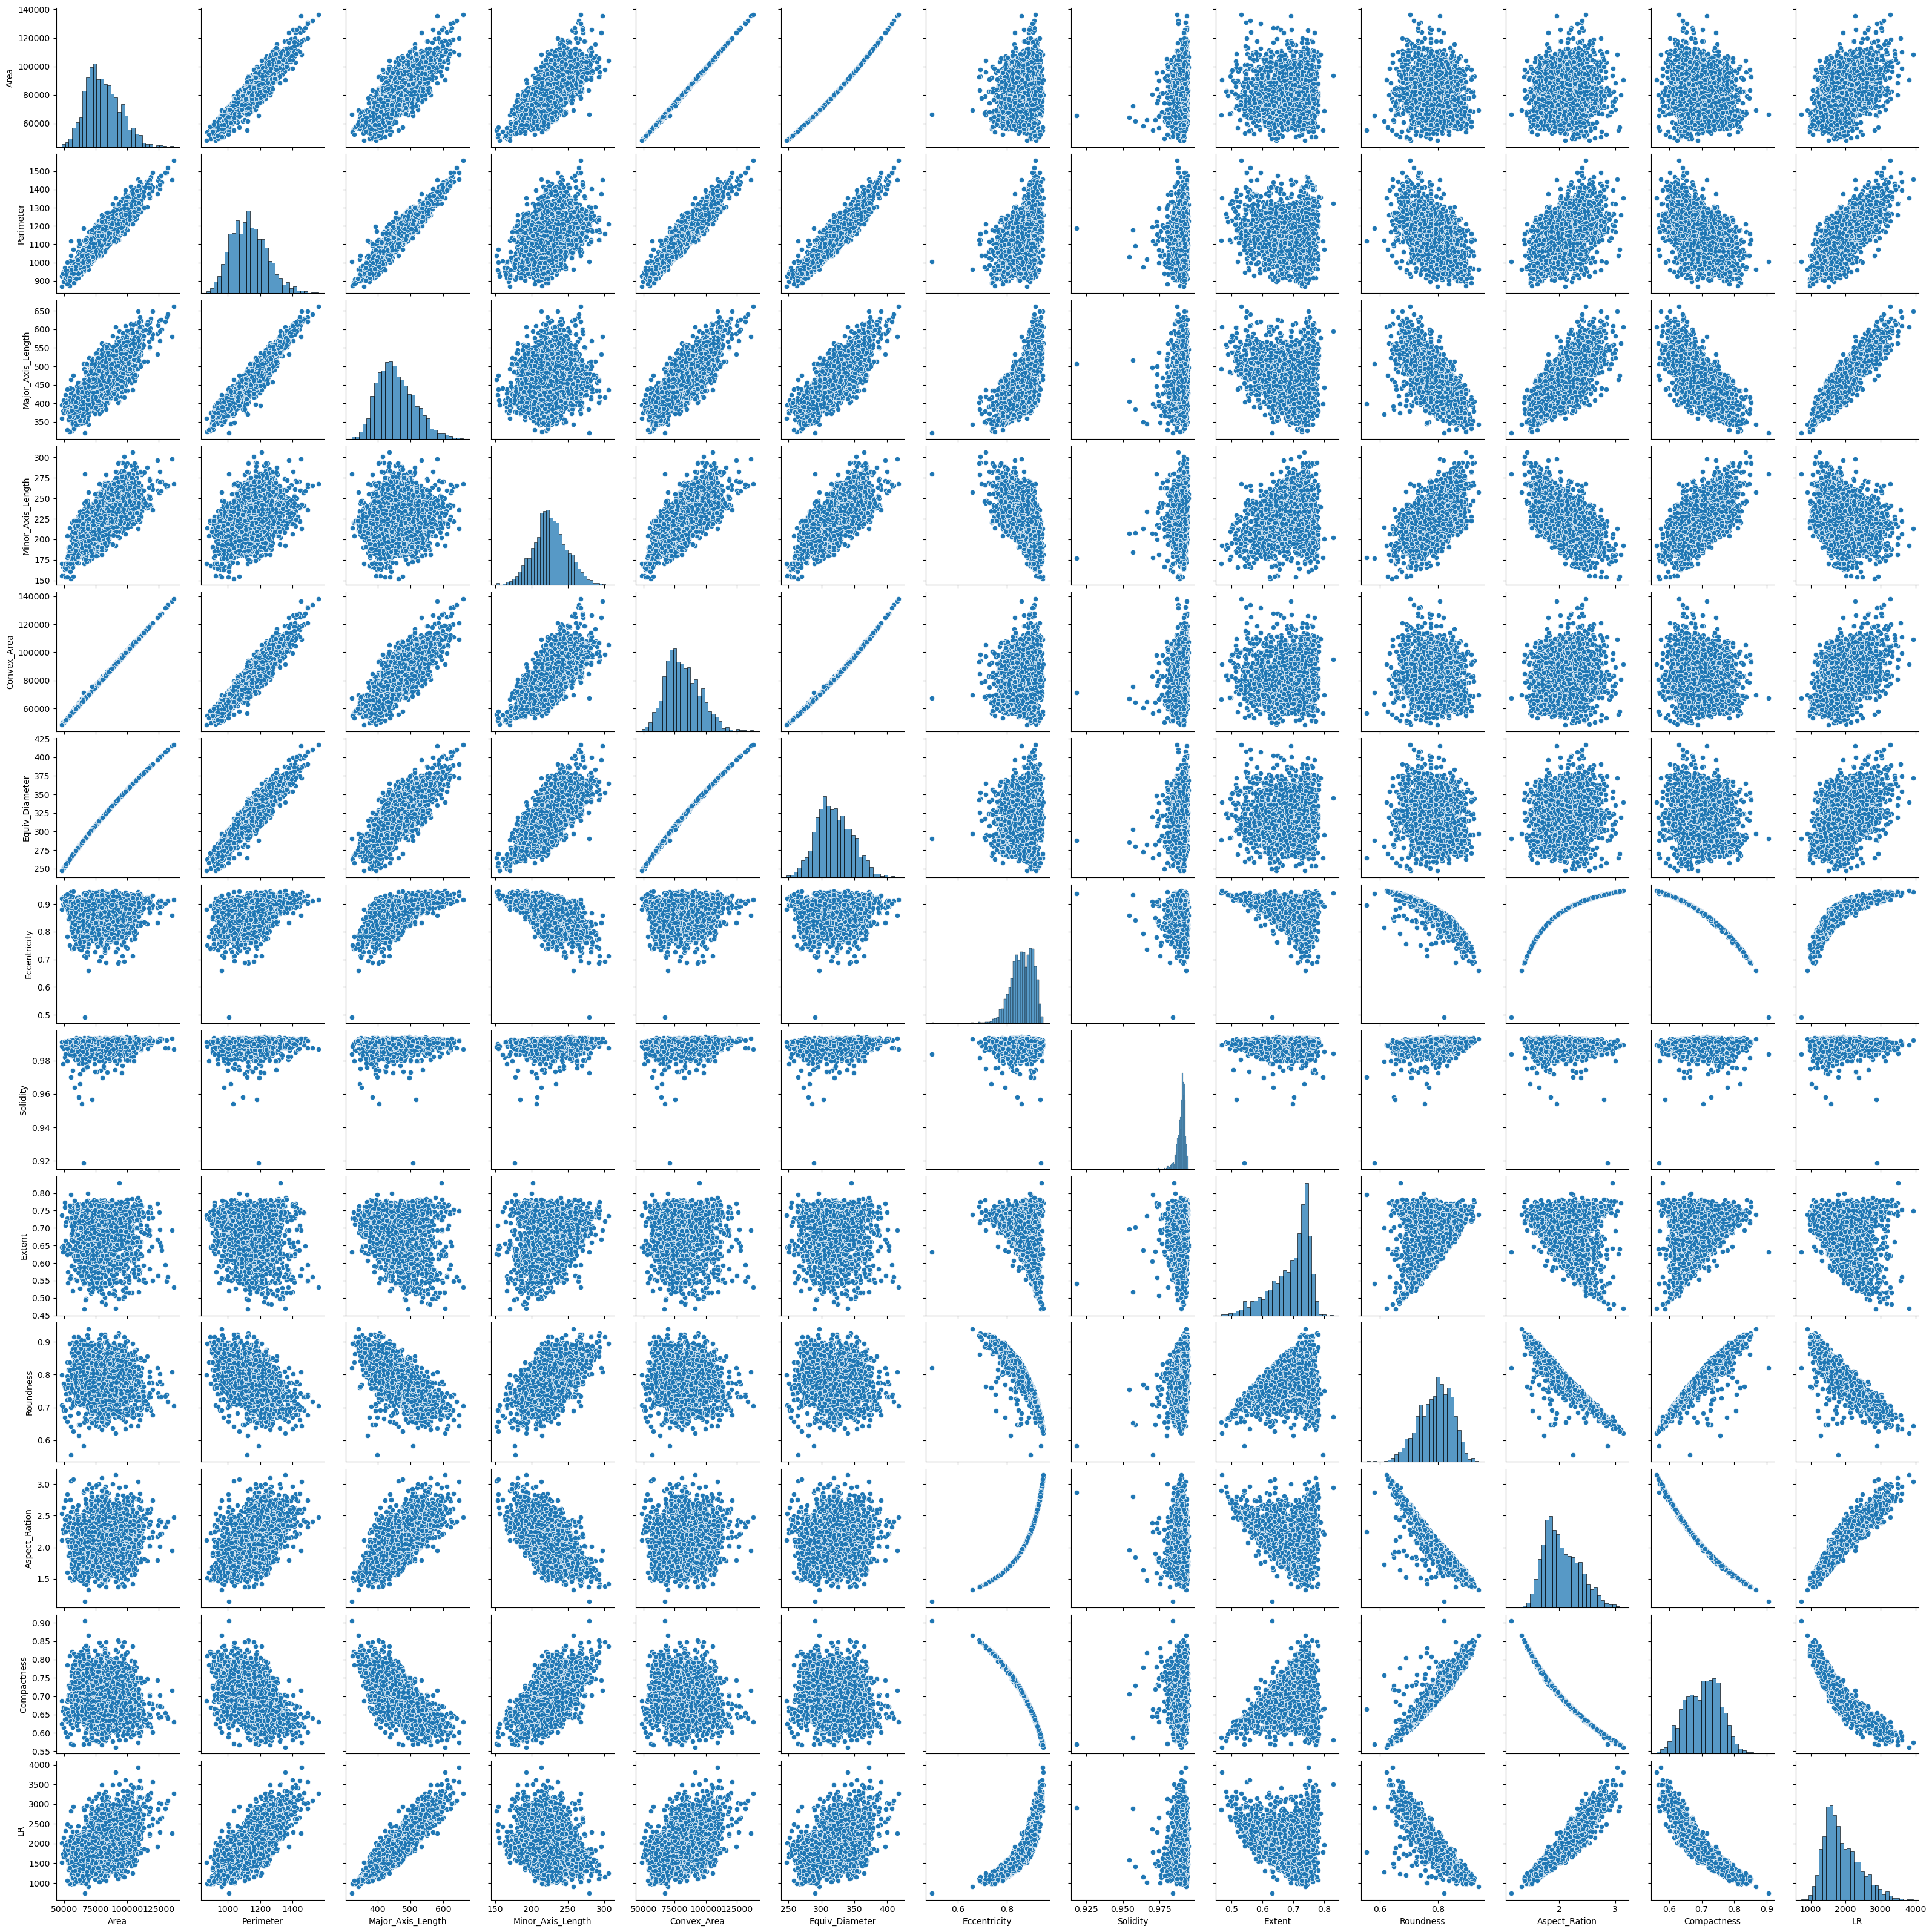

In [32]:
import seaborn as sns
sns.pairplot(dataset)

In [13]:
x = dataset.drop(['Major_Axis_Length', 'Class', "Solidity" ,"Minor_Axis_Length"], axis=1)
y = dataset['Class']

In [24]:
np.unique(y)

array([0, 1])

ENCODING CLASS

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
y

array([0, 0, 0, ..., 1, 1, 1], shape=(2500,))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
svc = SVC()

# SVM
Achieved Accuracy of 87.6% on test dataset <br>


In [86]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [87]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [88]:
accuracy_score(pipe.predict(x_test), y_test)

0.876

# Random Forest Classifier
Accuracy: 87.6

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
pipe2=  Pipeline([
    ('scaler', StandardScaler()),
    ('tree', RandomForestClassifier())
])

In [72]:
pipe2.fit(x_train, y_train)
accuracy_score(pipe2.predict(x_test), y_test)*100

87.6

# Decision Tree
Accuracy 84.2

In [79]:
from sklearn.tree import DecisionTreeClassifier
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())

])
pipe3.fit(x_train, y_train)
accuracy_score(pipe3.predict(x_test), y_test)*100

84.2

In [74]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, KernelPCA

### USING DIMENSIONALITY REDUCTION
PCA WITH RANDOM TREE CLASSIFIER <br>
Accuracy 85.4

In [99]:
pipe4 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('tree', RandomForestClassifier())

])
pipe4.fit(x_train, y_train)
accuracy_score(pipe4.predict(x_test), y_test)*100

85.39999999999999

# Model Evaluation
Random Forest and SVM are better than Decision Tree classifier <br>
<br>
PCA is not helping improving the model performance.
For improving accuracy we can shift to Deep Neural Networks

# 

## UNSUPERVISED IS NOT RECOMMENDED ON THIS DATASET
ACCURACY  IS AROUND 50 - 55%

In [132]:
km = KMeans(n_clusters=2)

In [133]:
km.fit(x_train_transformed, y_train)

KMeans(n_clusters=2)

In [134]:
pca = PCA(n_components=3)
pca.fit(x_train)

PCA(n_components=3)

In [135]:
preds = km.predict(pca.transform(x_test))

In [136]:
accuracy_score(preds, y_test)

0.566

### INSIGHTS
MODEL CAN BE DEPLOYED AT LARGE SCALE FARM IN SEGREGATING PUMPKIN SEEDS
